In [78]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "loan-status-prediction"

In [79]:
library(dplyr)
library(psych)
library(ggplot2)
library(ggcorrplot)

# **1. Data Import**

In [80]:
data <- read.csv('/kaggle/input/loan-status-prediction/loan_data.csv', stringsAsFactors = F)

* **Loan_ID: A unique loan ID.**
* **Gender: Either male or female.**
* **Married: Weather Married(yes) or Not Marttied(No).**
* **Dependents: Number of persons depending on the client.**
* **Education: Applicant Education(Graduate or Undergraduate).**
* **Self_Employed: Self-employed (Yes/No).**
* **ApplicantIncome: Applicant income.**
* **CoapplicantIncome: Co-applicant income.**
* **LoanAmount: Loan amount in thousands.**
* **Loan_Amount_Term: Terms of the loan in months.**
* **Credit_History: Credit history meets guidelines.**
* **Property_Area: Applicants are living either Urban, Semi-Urban or Rural.**
* **Loan_Status: Loan approved (Y/N).**

# 1-1. Data Structure 

In [81]:
table(is.na(data))


FALSE  TRUE 
 4912    41 

In [82]:
colSums(is.na(data))

Loan_ID            Gender           Married        Dependents 
                0                 0                 0                 0 
        Education     Self_Employed   ApplicantIncome CoapplicantIncome 
                0                 0                 0                 0 
       LoanAmount  Loan_Amount_Term    Credit_History     Property_Area 
                0                11                30                 0 
      Loan_Status 
                0

In [83]:
data <- na.omit(data)

In [84]:
str(data)

'data.frame':	340 obs. of  13 variables:
 $ Loan_ID          : chr  "LP001003" "LP001005" "LP001006" "LP001008" ...
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "Yes" "Yes" "Yes" "No" ...
 $ Dependents       : chr  "1" "0" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Not Graduate" "Graduate" ...
 $ Self_Employed    : chr  "No" "Yes" "No" "No" ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 ...
 $ CoapplicantIncome: num  1508 0 2358 0 1516 ...
 $ LoanAmount       : num  128 66 120 141 95 70 109 114 17 125 ...
 $ Loan_Amount_Term : num  360 360 360 360 360 360 360 360 120 360 ...
 $ Credit_History   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Property_Area    : chr  "Rural" "Urban" "Urban" "Urban" ...
 $ Loan_Status      : chr  "N" "Y" "Y" "Y" ...
 - attr(*, "na.action")= 'omit' Named int [1:41] 11 14 25 30 32 33 54 57 61 78 ...
  ..- attr(*, "names")= chr [1:41] "11" "14" "25" "30" ...


In [85]:
dim(data)

[1] 340  13

In [86]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loan_ID*,1,340,170.5000000,98.2937774,170.5,170.5000000,126.0210,1,340,339,0.00000000,-1.2105933,5.33072853
Gender*,2,340,2.7588235,0.4615721,3.0,2.8419118,0.0000,1,3,2,-1.64423586,1.7049768,0.02503226
Married*,3,340,1.5911765,0.4923411,2.0,1.6139706,0.0000,1,2,1,-0.36928990,-1.8690964,0.02670095
Dependents*,4,340,2.6529412,1.0147105,2.0,2.5000000,0.0000,1,5,4,1.03492469,-0.1503229,0.05503040
Education*,5,340,1.2588235,0.4386340,1.0,1.1985294,0.0000,1,2,1,1.09643632,-0.8001549,0.02378827
Self_Employed*,6,340,2.0264706,0.3792625,2.0,2.0000000,0.0000,1,3,2,0.27611707,3.8593352,0.02056839
ApplicantIncome,7,340,3595.0705882,1443.0878094,3336.5,3445.2647059,1229.8167,150,9703,9553,1.11534005,1.9995824,78.26242479
CoapplicantIncome,8,340,1256.7321176,2420.6646173,918.0,931.1688235,1361.0268,0,33837,33837,8.69990910,104.6102173,131.27897091
LoanAmount,9,340,105.1176471,28.9632711,110.0,107.9044118,26.6868,9,150,141,-0.82573972,0.1949654,1.57075392


In [87]:
summary(data)

   Loan_ID             Gender            Married           Dependents       
 Length:340         Length:340         Length:340         Length:340        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:340         Length:340         Min.   : 150    Min.   :    0    
 Class :character   Class :character   1st Qu.:2600    1st Qu.:    0    
 Mode  :character   Mode  :character   Median :3336    Median :  918    
                                       Mean   :3595    Mean   : 1257    
                                       3rd Qu.:4291    3rd Qu.: 1954    
                       

# 1-2. Data Transform

In [88]:
# Gender : Male -> 0, Female -> 1
data$Gender <- ifelse(data$Gender == 'Male',0,
                      ifelse(data$Gender == 'Female',1,2))

# Marrid : No - > 0, Yes -> 1
data$Married <- ifelse(data$Married == 'No',0,
                      ifelse(data$Married == 'Yes',1,2))

# Education : Not Graduate -> 0 , Graduate ->1 
data$Education <- ifelse(data$Education == 'Not Graduate',0,
                      ifelse(data$Education == 'Graduate',1,2))
        
#Self_Employed : No-> 0 , Yes -> 1
data$Self_Employed <- ifelse(data$Self_Employed == 'No',0,
                          ifelse(data$Self_Employed == 'Yes',1,2))

#Property_Area : Urban -> 2, Semi-Urban -> 1, Rural -> 0
data$Property_Area  <- ifelse(data$Property_Area  == 'Rural',0,
                          ifelse(data$Property_Area  == 'Semiurban',1,
                            ifelse(data$Property_Area == 'Urban',2,3)))

# Loan_Status : N -> 0 , Y-> 1
data$Loan_Status <- ifelse(data$Loan_Status == 'N',0,
                      ifelse(data$Loan_Status == 'Y',1,2))

# Dependents :  NA,0 -> 0 , 1 or 2 or 3+ -> 1
data$Dependents  <- ifelse(data$Dependents == '' | data$Dependents == '0' ,0,
                            ifelse(data$Dependents == '1' | data$Dependents =='2' | data$Dependents == '3+',1, 2))

In [89]:
data$Loan_Status <- as.factor(data$Loan_Status)

# 1-3. Data Check

In [90]:
head(data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,LP001003,0,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,0,1,0,1,1,3000,0,66,360,1,2,1
3,LP001006,0,1,0,0,0,2583,2358,120,360,1,2,1
4,LP001008,0,0,0,1,0,6000,0,141,360,1,2,1
5,LP001013,0,1,0,0,0,2333,1516,95,360,1,2,1
6,LP001024,0,1,1,1,0,3200,700,70,360,1,2,1


# **2. Data Visualization & EDA**

**Loan_Status count**

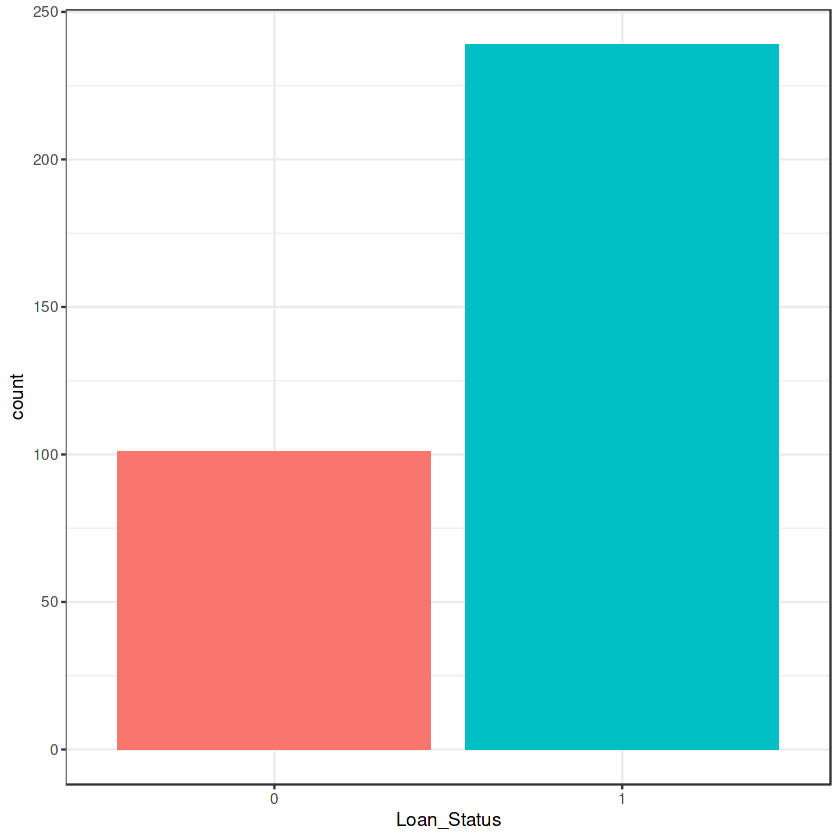

In [91]:
ggplot(data, aes(x=Loan_Status, fill = Loan_Status)) +
    geom_bar() +
    theme_bw() +
    theme(legend.position="none")

**Applicantincome by Loan_Status**

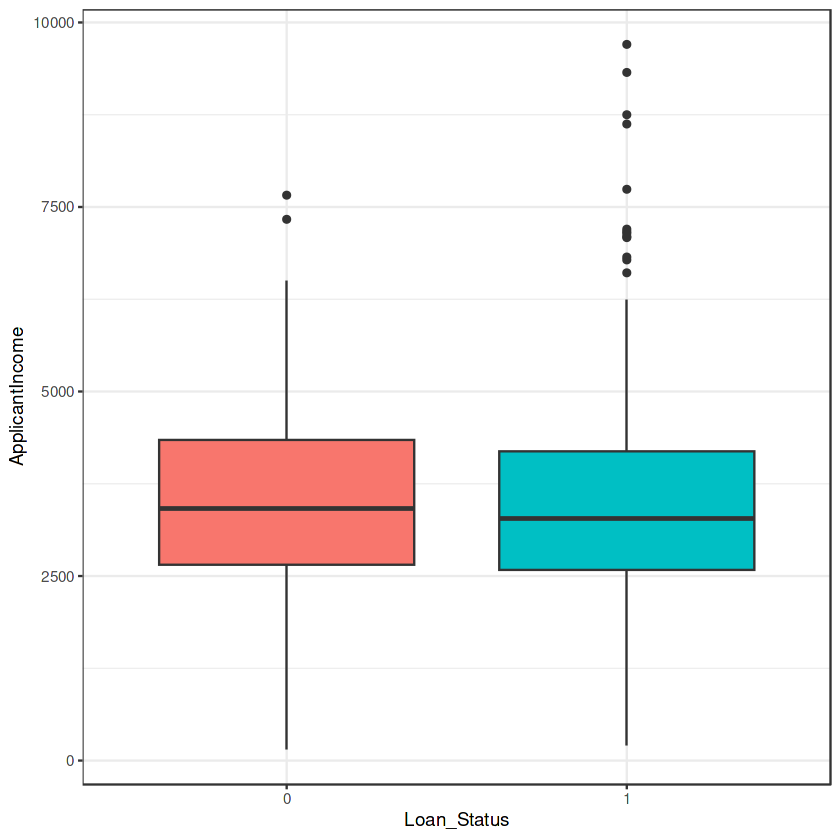

In [92]:
ggplot(data, aes(x=Loan_Status, y = ApplicantIncome, fill = Loan_Status)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position="none")

**Statistics of Education status by Loan_status**

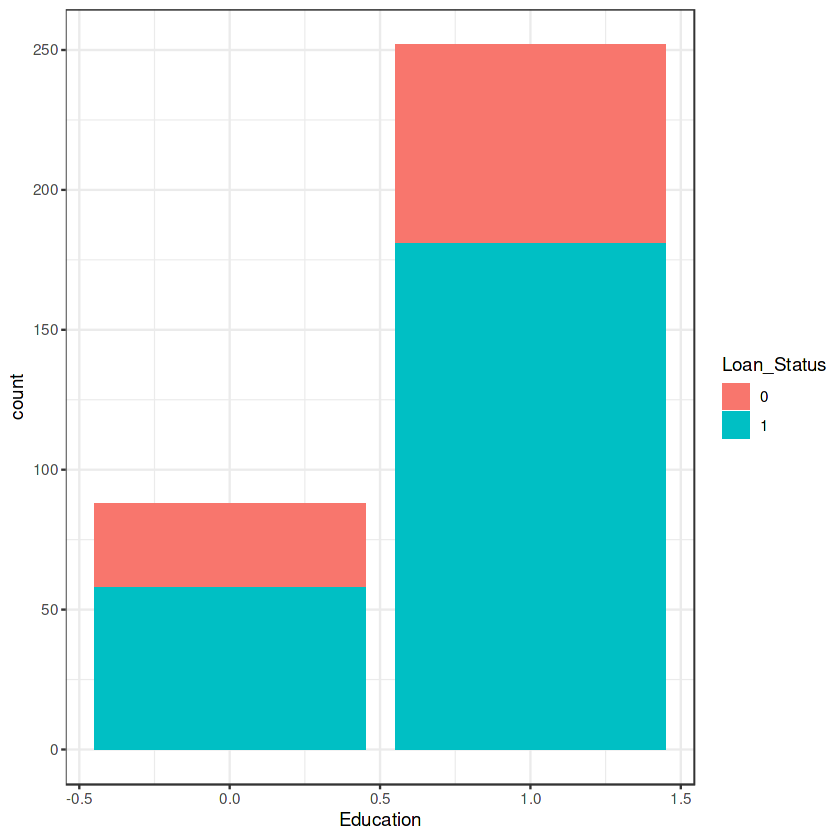

In [93]:
ggplot(data, aes(x=Education, fill = Loan_Status)) +
    geom_bar() +
    theme_bw() 

**histogram**

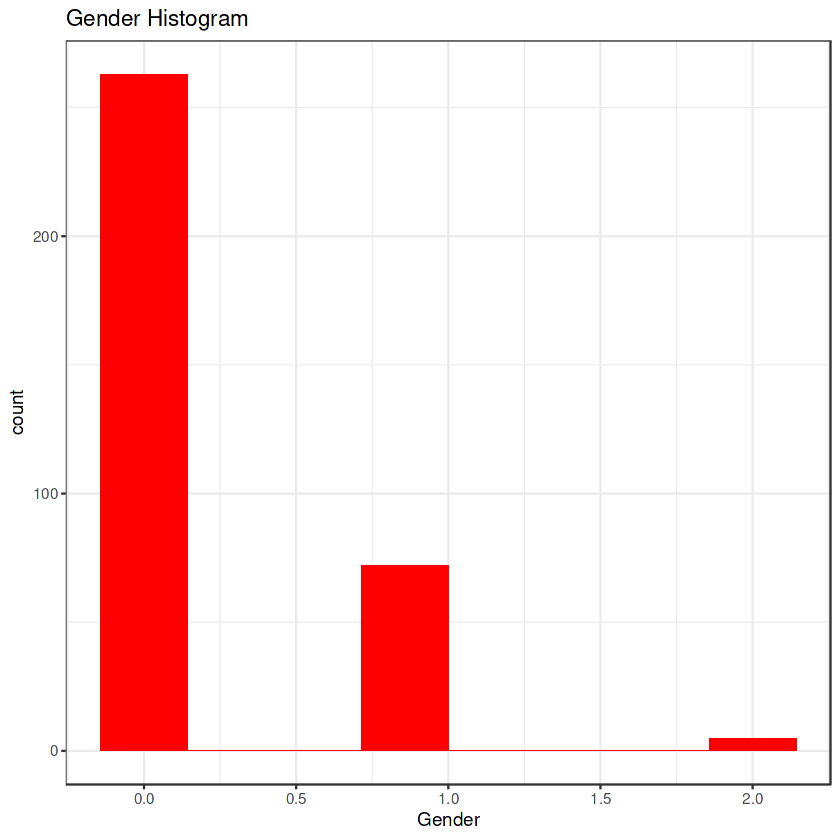

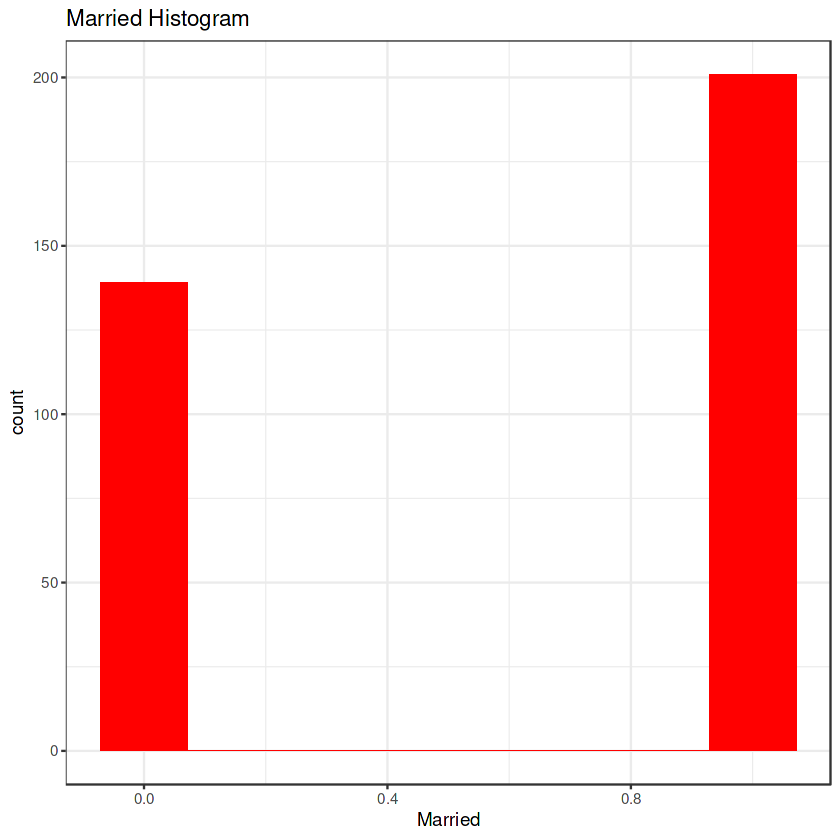

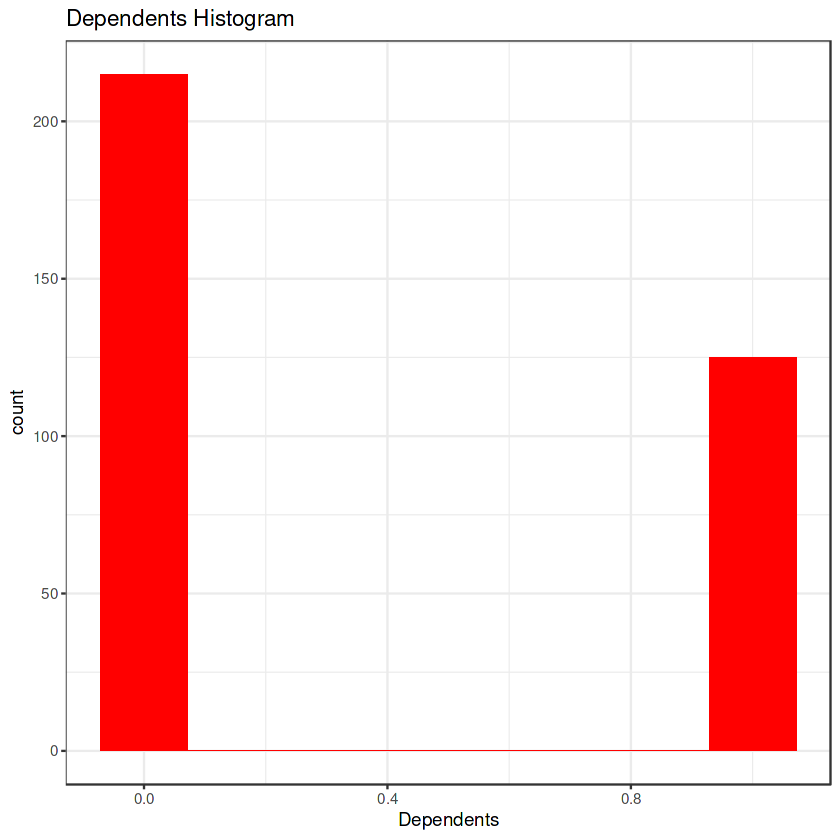

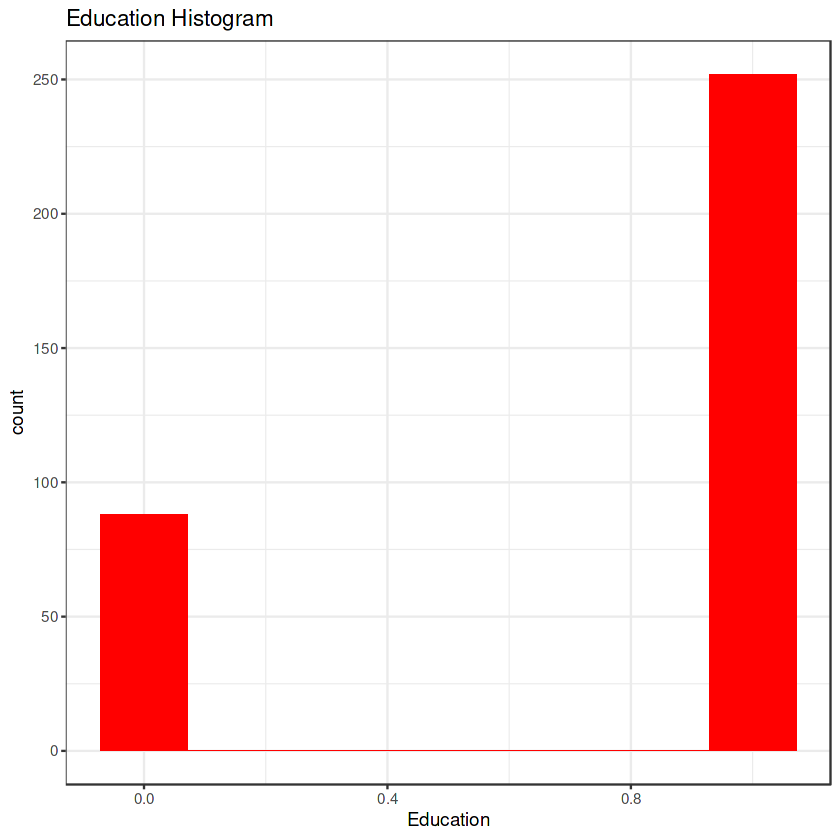

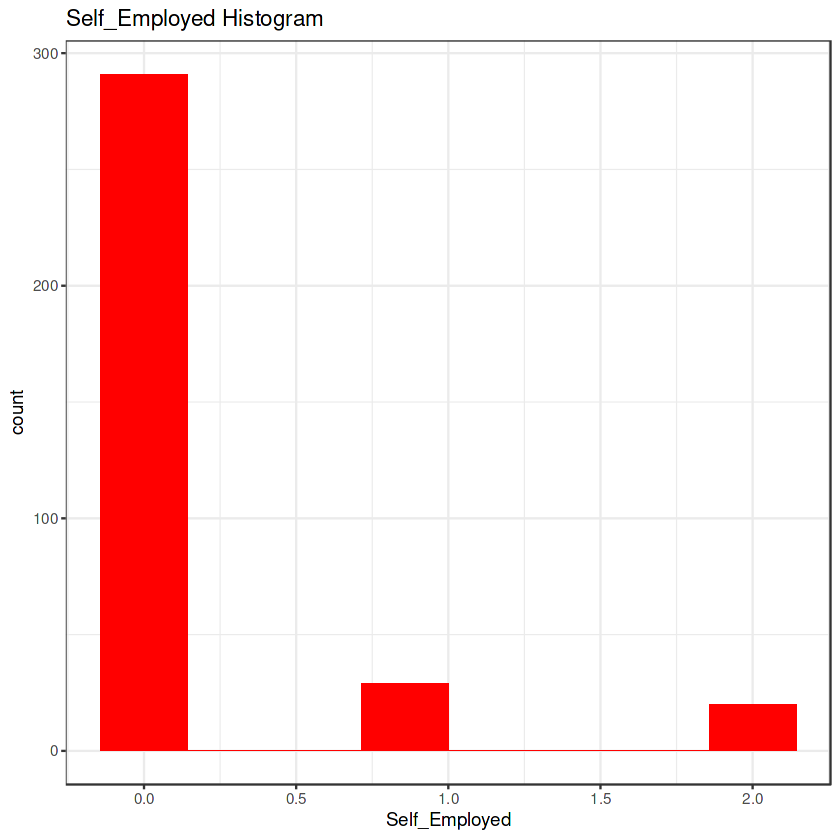

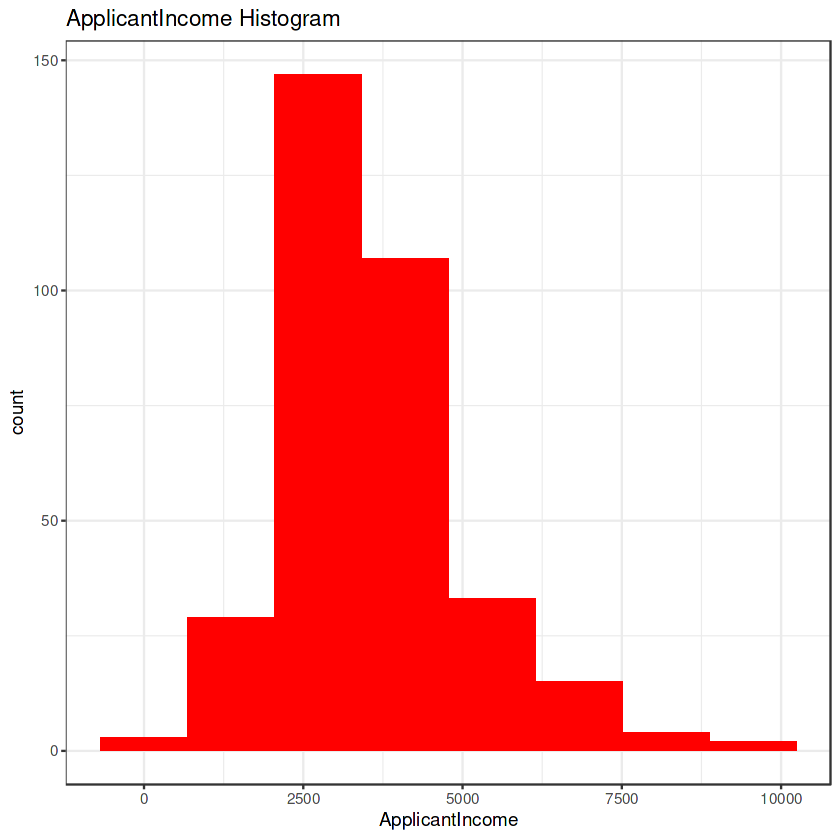

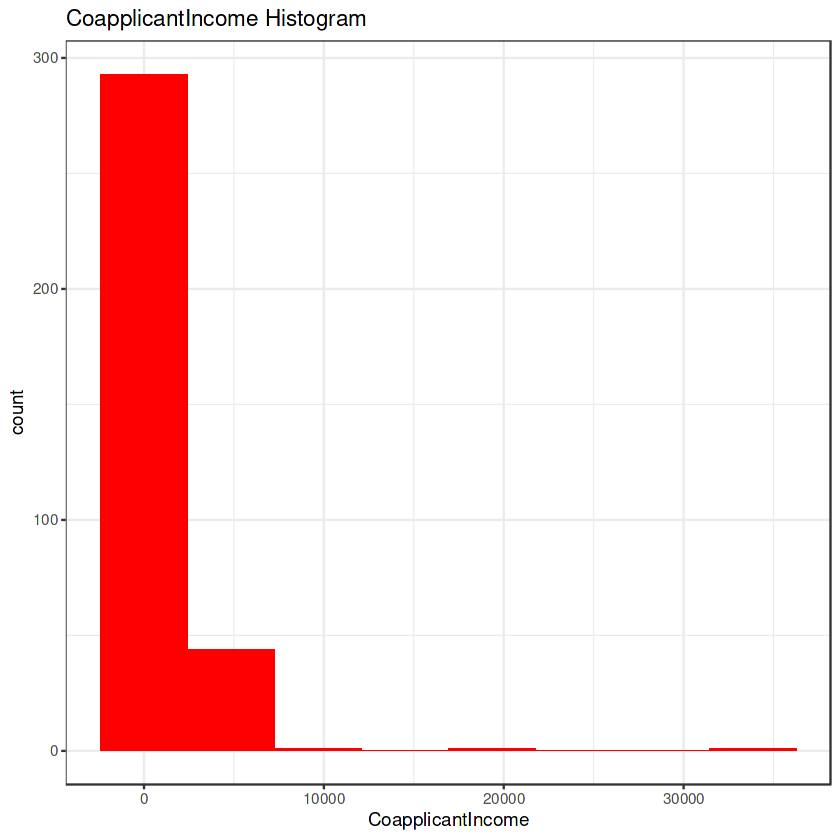

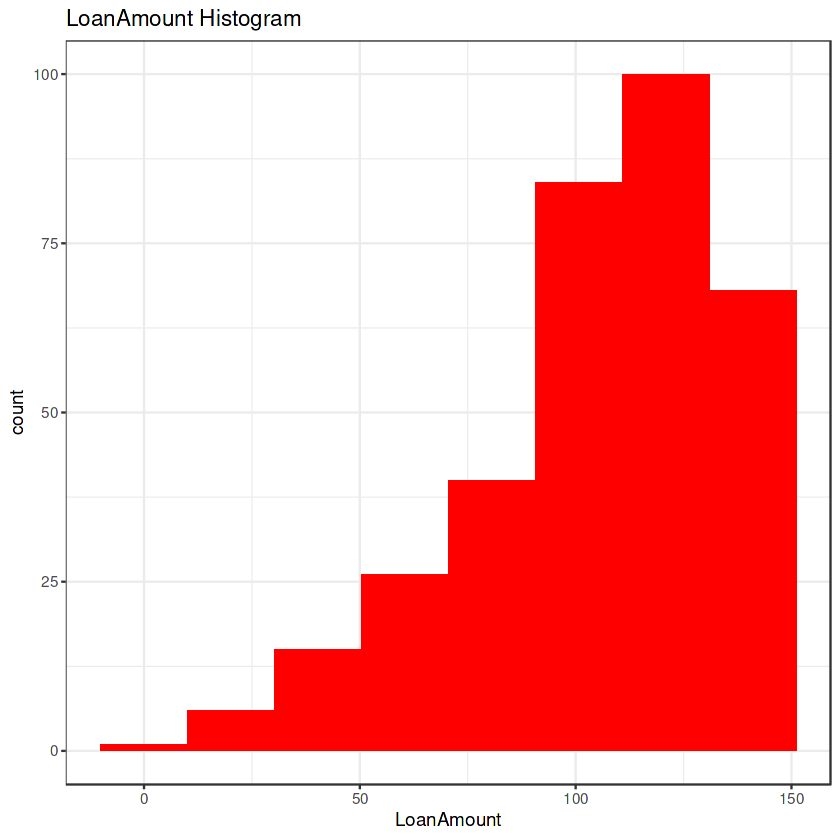

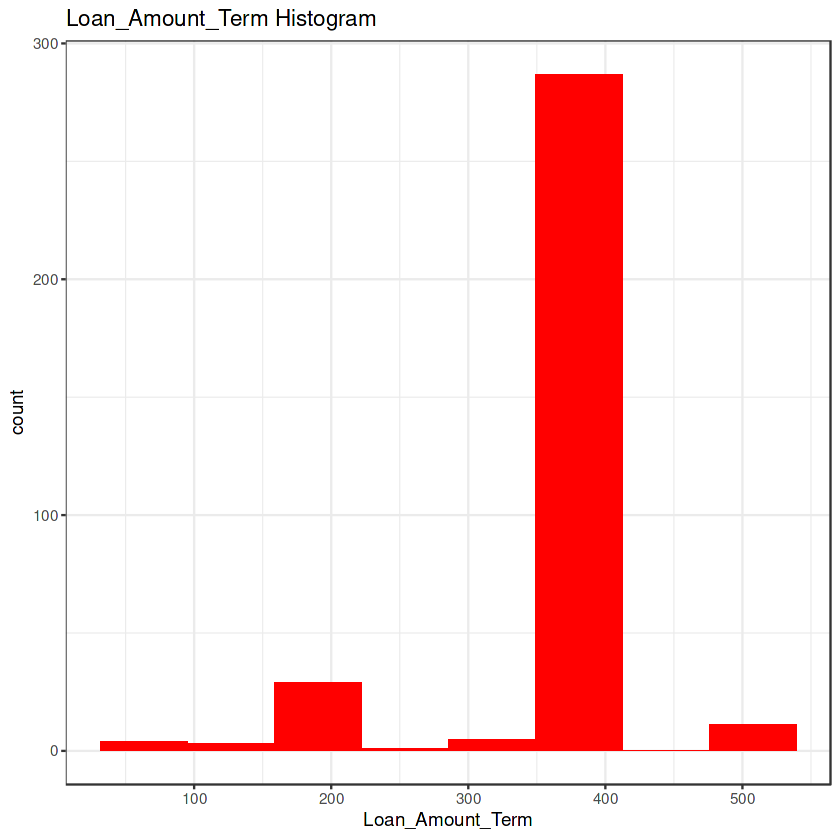

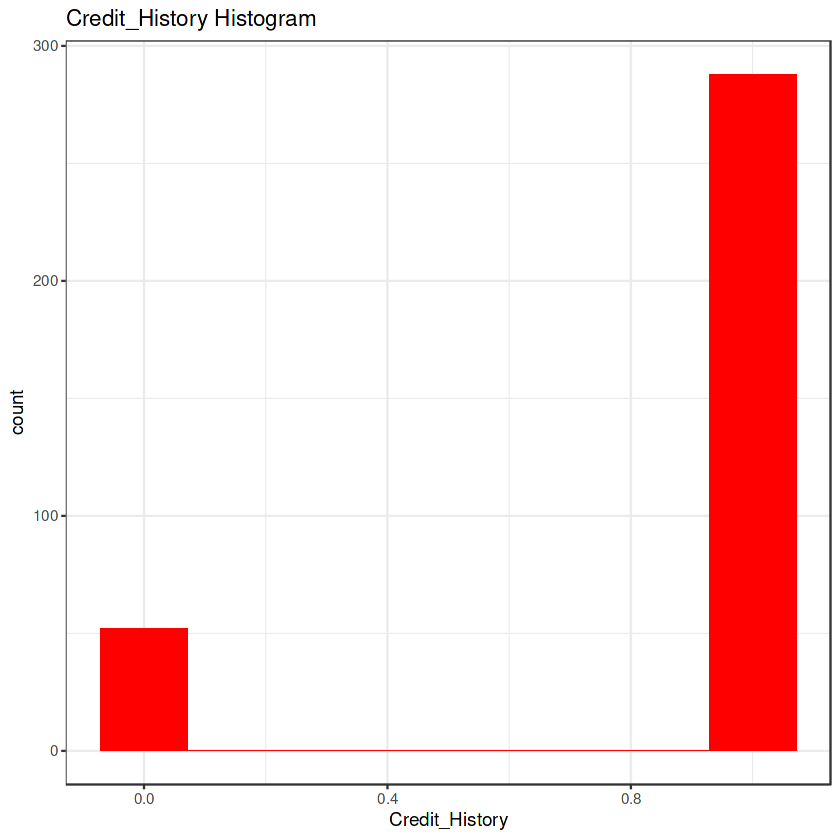

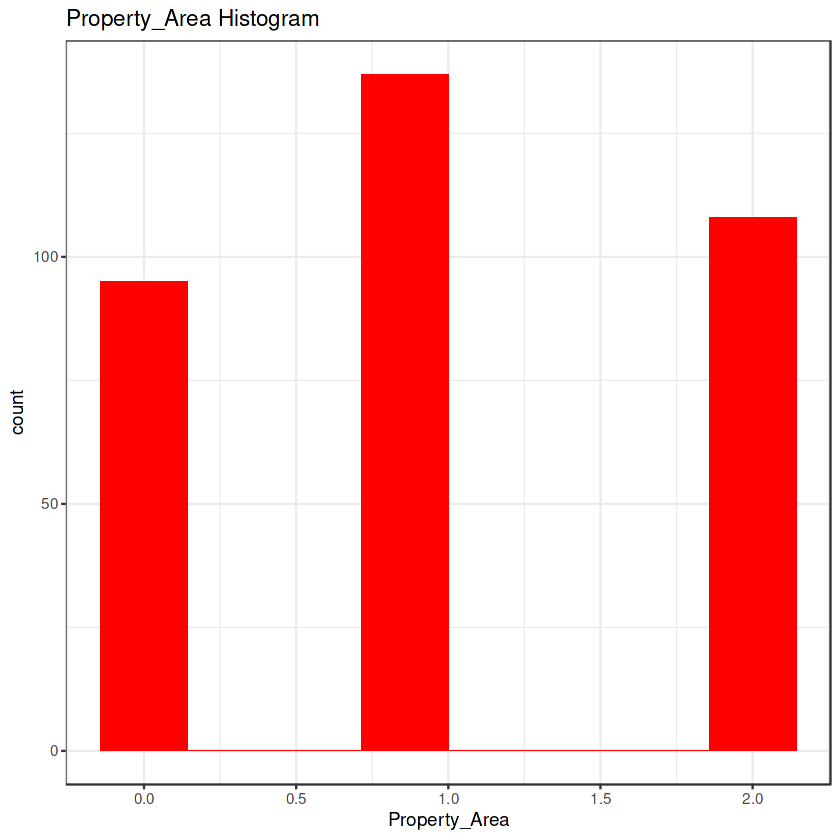

In [94]:
cols = c('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area')

for(i in cols){
    print(ggplot(data, aes(x=data[,i])) + geom_histogram(fill = 'red', bins = 8)+ xlab(i) +theme_bw() +  ggtitle(paste(i,'Histogram')))
}

**Correlation**

In [95]:
cor <- cor(data[,cols])

In [96]:
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.00000000,-0.30473861,-0.14753198,0.119816533,0.04055018,-0.02172585,-0.093394873,-0.04206717,0.110401964,-0.114513215,-0.01765642
Married,-0.30473861,1.00000000,0.38592304,-0.040656827,-0.04290945,-0.06647186,0.079795417,0.15129117,-0.138570530,0.028941322,0.03344795
Dependents,-0.14753198,0.38592304,1.00000000,-0.078647584,0.07653812,0.07571643,-0.060748810,0.06502540,-0.120370262,0.018941372,0.07287997
Education,0.11981653,-0.04065683,-0.07864758,1.000000000,-0.01449758,0.04112732,0.042540971,0.02353351,0.117373910,-0.008560223,0.09018601
Self_Employed,0.04055018,-0.04290945,0.07653812,-0.014497582,1.00000000,0.10868921,-0.040208395,0.03306959,-0.024705535,0.070384739,-0.09833032
ApplicantIncome,-0.02172585,-0.06647186,0.07571643,0.041127317,0.10868921,1.00000000,-0.255239182,0.25670908,-0.088938155,0.022647547,-0.04801071
CoapplicantIncome,-0.09339487,0.07979542,-0.06074881,0.042540971,-0.04020840,-0.25523918,1.000000000,0.12482426,0.003301887,0.011842841,0.01796521
LoanAmount,-0.04206717,0.15129117,0.06502540,0.023533512,0.03306959,0.25670908,0.124824264,1.00000000,0.149059255,-0.053086009,-0.16044136
Loan_Amount_Term,0.11040196,-0.13857053,-0.12037026,0.117373910,-0.02470553,-0.08893815,0.003301887,0.14905925,1.000000000,-0.013452384,-0.09740250
Credit_History,-0.11451321,0.02894132,0.01894137,-0.008560223,0.07038474,0.02264755,0.011842841,-0.05308601,-0.013452384,1.000000000,0.05281689


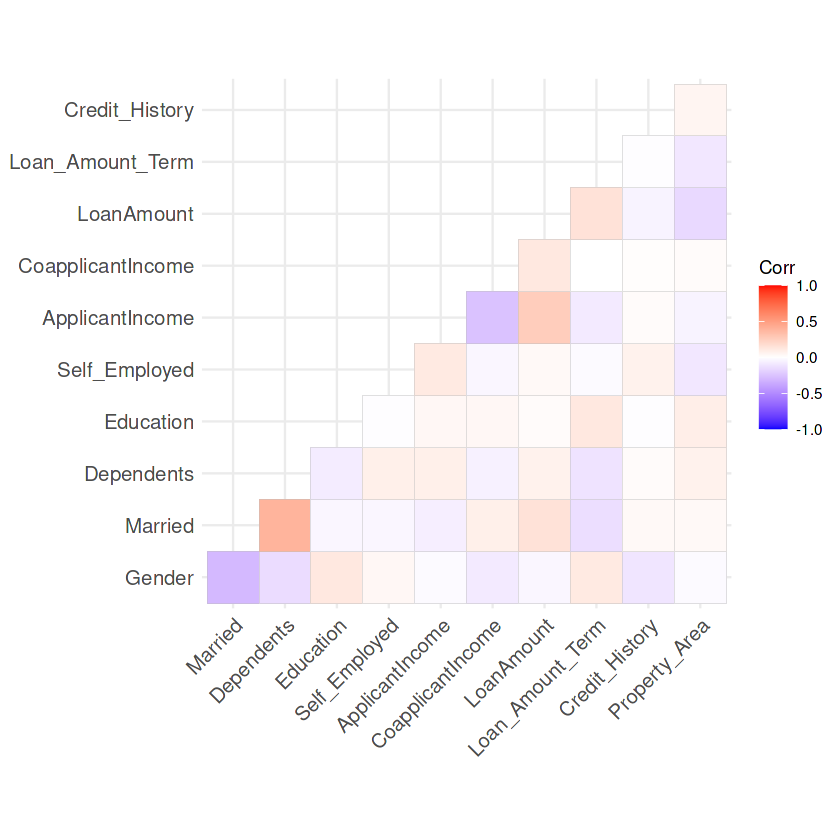

In [97]:
ggcorrplot(cor,type = "lower")

# 3. Modeling

In [126]:
library(caret)
library(randomForest)
library(e1071)

In [99]:
idx <- sample(1:nrow(data),nrow(data)*0.75)
train<- data[idx,-1]
test <- data[-idx,-1]

# 3-1. LogisticRegression

In [100]:
md_glm <- glm(Loan_Status ~. , data= train , family= binomial)

In [101]:
summary(md_glm)


Call:
glm(formula = Loan_Status ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2448  -0.3264   0.4720   0.6288   2.4405  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.940e+00  1.407e+00  -2.090   0.0366 *  
Gender            -1.019e-01  4.271e-01  -0.238   0.8115    
Married            4.667e-01  4.323e-01   1.080   0.2804    
Dependents         1.675e-01  4.182e-01   0.401   0.6888    
Education          9.265e-01  3.979e-01   2.328   0.0199 *  
Self_Employed     -3.117e-01  3.089e-01  -1.009   0.3129    
ApplicantIncome   -3.869e-05  1.331e-04  -0.291   0.7713    
CoapplicantIncome -4.964e-05  5.369e-05  -0.925   0.3552    
LoanAmount         7.429e-03  6.441e-03   1.153   0.2487    
Loan_Amount_Term  -3.425e-03  3.093e-03  -1.107   0.2682    
Credit_History     4.307e+00  6.553e-01   6.573 4.92e-11 ***
Property_Area     -6.735e-02  2.429e-01  -0.277   0.7815    
---
Sig

In [102]:
step(md_glm, direction = "backward" )

Start:  AIC=233.18
Loan_Status ~ Gender + Married + Dependents + Education + Self_Employed + 
    ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + 
    Credit_History + Property_Area

                    Df Deviance    AIC
- Gender             1   209.23 231.23
- Property_Area      1   209.25 231.25
- ApplicantIncome    1   209.26 231.26
- Dependents         1   209.34 231.34
- CoapplicantIncome  1   209.99 231.99
- Self_Employed      1   210.15 232.15
- Married            1   210.34 232.34
- LoanAmount         1   210.49 232.49
- Loan_Amount_Term   1   210.52 232.52
<none>                   209.18 233.18
- Education          1   214.50 236.50
- Credit_History     1   300.15 322.15

Step:  AIC=231.23
Loan_Status ~ Married + Dependents + Education + Self_Employed + 
    ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + 
    Credit_History + Property_Area

                    Df Deviance    AIC
- ApplicantIncome    1   209.31 229.31
- Property_Are


Call:  glm(formula = Loan_Status ~ Married + Education + Credit_History, 
    family = binomial, data = train)

Coefficients:
   (Intercept)         Married       Education  Credit_History  
       -3.6159          0.7139          0.8087          4.1800  

Degrees of Freedom: 254 Total (i.e. Null);  251 Residual
Null Deviance:	    310.7 
Residual Deviance: 213.3 	AIC: 221.3

# Select the appropriate variable

In [108]:
md_glm <- glm(Loan_Status ~ Married + Education +  Credit_History  , data= train , family= binomial)

In [109]:
summary(md_glm)


Call:
glm(formula = Loan_Status ~ Married + Education + Credit_History, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0993  -0.3424   0.4837   0.6721   2.3941  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.6159     0.7270  -4.974 6.57e-07 ***
Married          0.7139     0.3516   2.030   0.0423 *  
Education        0.8087     0.3759   2.151   0.0314 *  
Credit_History   4.1800     0.6369   6.563 5.29e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 310.69  on 254  degrees of freedom
Residual deviance: 213.27  on 251  degrees of freedom
AIC: 221.27

Number of Fisher Scoring iterations: 5


The regression equation for this model is -3.6159 + Married * 0.7139 + Education * 0.8087+ Credit_History * 4.1800

In [130]:
pred <- as.factor(round(predict(md_glm,test,type = "response")))

In [116]:
pred

47 377  29 236  63 263  97 225   2 331 281 155  66 354 143 201 365 100 266 170 
  1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1 
137 212 197  58 308 258  62 319 124  72 116 369 174  79 381  96 238 142 275  37 
  0   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1 
248 293 252 106 196 299 160 118 210 325 257 251 186 339 271   6  27  69 317 135 
  1   1   1   1   0   0   0   1   1   1   1   0   0   1   1   1   1   1   1   0 
264 154 245 357  36 239 348 379 140 306 362  19 150 366  13 343 261 110   4 141 
  1   1   1   0   0   1   0   1   1   1   0   1   1   1   1   1   1   0   1   1 
 12 157 289 171  44  49 178 321 138 145   9  73  81 255 163 374  87 234 324 183 
  0   1   0   1   1   0   1   1   1   1   1   1   1   0   1   1   1   1   1   1 
 70 152 147 259 265 307 167   8 353 112   3 292 276  67 334  94 184 125 221 337 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   0   1   0   0 
303 217  16 378  48 332 227 296 262 340 273 278 295 104 226 215 149 297 322  90 
  1   1   0   1   0   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1 
 59  85 260 272 241 330  93  46 290 372  84 129 370 328  56 336  89 182 361 168 
  1   1   1   1   1   1   1   1   0   0   1   0   1   0   1   1   1   1   1   1 
191 349 177 193  15 164 269 166 181 134  45 246 231 222 198  68 309 199 179  76 
  1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1 
 98 224 208 287 280  86 102 333 213 313 169 218  50 230 205  92 158 341 249 202 
  1   1   0   0   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1   1 
350 192 286 131  88  71 176 342   7 291 351 114  52 283  35  22 153 109 128 223 
  0   1   0   1   1   1   1   0   1   1   1   0   1   1   1   1   1   1   1   1 
195 127 121 300 301  10 358  42  31 229  80 346  28 285  20  41 117  75 277  95 
  1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   0   1 
254 188 253 364 298 347 151 323 133  26 108  18 123 216 209 
  0   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
Levels: 0 1

In [131]:
confusionMatrix(pred, reference = test$Loan_Status)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 11  0
         1 14 60
                                          
               Accuracy : 0.8353          
                 95% CI : (0.7391, 0.9069)
    No Information Rate : 0.7059          
    P-Value [Acc > NIR] : 0.004468        
                                          
                  Kappa : 0.5259          
                                          
 Mcnemar's Test P-Value : 0.000512        
                                          
            Sensitivity : 0.4400          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.8108          
             Prevalence : 0.2941          
         Detection Rate : 0.1294          
   Detection Prevalence : 0.1294          
      Balanced Accuracy : 0.7200          
                                          
       'Positive' Class : 0               
                                    

**Accuracy : 0.8353**

# 3-2. RandomForest

In [121]:
md_rf <-  randomForest(Loan_Status~., data = train, ntree=300)

In [122]:
pred_rf <- predict(md_rf,test)

In [124]:
confusionMatrix(pred_rf, reference = test$Loan_Status)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  4
         1 12 56
                                          
               Accuracy : 0.8118          
                 95% CI : (0.7124, 0.8884)
    No Information Rate : 0.7059          
    P-Value [Acc > NIR] : 0.01842         
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : 0.08012         
                                          
            Sensitivity : 0.5200          
            Specificity : 0.9333          
         Pos Pred Value : 0.7647          
         Neg Pred Value : 0.8235          
             Prevalence : 0.2941          
         Detection Rate : 0.1529          
   Detection Prevalence : 0.2000          
      Balanced Accuracy : 0.7267          
                                          
       'Positive' Class : 0               
                                    

**Accuracy : 0.8118**

# 3-3. SVM

In [127]:
md_svm <- svm(Loan_Status~., data = train, type="C-classification",kernel = "radial", cost=10 , gamma=0.1)

In [132]:
pred_svm <- predict(md_svm,test)

In [133]:
confusionMatrix(pred_svm, reference = test$Loan_Status)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  4
         1 12 56
                                          
               Accuracy : 0.8118          
                 95% CI : (0.7124, 0.8884)
    No Information Rate : 0.7059          
    P-Value [Acc > NIR] : 0.01842         
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : 0.08012         
                                          
            Sensitivity : 0.5200          
            Specificity : 0.9333          
         Pos Pred Value : 0.7647          
         Neg Pred Value : 0.8235          
             Prevalence : 0.2941          
         Detection Rate : 0.1529          
   Detection Prevalence : 0.2000          
      Balanced Accuracy : 0.7267          
                                          
       'Positive' Class : 0               
                                    

**Accuracy : 0.8118**

# Logistic Regression has the highest accuracy.

In [135]:
write.csv(pred, "LR_pred.csv",row.names = F)